# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from art.utils import load_cifar10
from art.estimators.classification import KerasClassifier
from art.attacks.poisoning import PoisoningAttackBackdoor, FeatureCollisionAttack
from art.attacks.poisoning.perturbations import add_pattern_bd
from art.defences.trainer import AdversarialTrainerMadryPGD

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [149]:
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

# Model

In [150]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        Conv2D(64, (3, 3), activation="relu", padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        
        Flatten(),
        
        Dense(512, activation="relu"),
        Dense(10, activation="softmax")
    ])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
    return model

In [151]:
model = create_model()

In [152]:
classifier = KerasClassifier(
    model=model,
    clip_values=(min_, max_),
    use_logits=False,
    preprocessing=(0.5, 1)
)

In [153]:
classifier.fit(x_train, y_train, nb_epochs=10)

# Attack

In [154]:
base_class = "frog"
target_class = "bird"

In [155]:
y_target = np.zeros(10, dtype=np.float32)
y_target[6] = 1.0
y_target

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [156]:
target_idx = np.all(y_test == y_target, axis=1)

In [157]:
base_instances = np.copy(x_test[target_idx])
base_labels = np.copy(y_test[target_idx])

In [158]:
y_pred = np.argmax(model.predict(base_instances), axis=1)
print("Accuracy:", np.sum(y_pred == np.argmax(base_labels, axis=1)) / len(base_labels))

Accuracy: 0.383


In [159]:
feature_layer = classifier.layer_names[-2]

In [160]:
target_instance = np.expand_dims(x_test[np.argmax(y_test, axis=1) == 3][3], axis=0)

In [161]:
attack = FeatureCollisionAttack(
    classifier, 
    target_instance, 
    feature_layer,
    max_iter=10, 
    similarity_coeff=256, 
    watermark=0.3
)

In [162]:
poison, poison_labels = attack.poison(base_instances)

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

Feature collision:   0%|          | 0/10 [00:00<?, ?it/s]

# Results

In [164]:
adv_preds = np.argmax(classifier.predict(poison), axis=1)

In [165]:
y_true = np.argmax(base_labels, axis=1)

In [166]:
cifar10_class_labels = ["airplane", "automobile", "bird", "cat", "deer",
                        "dog", "frog", "horse", "ship", "truck"]

In [172]:
poison_labels_true = np.argmax(poison_labels, axis=1)

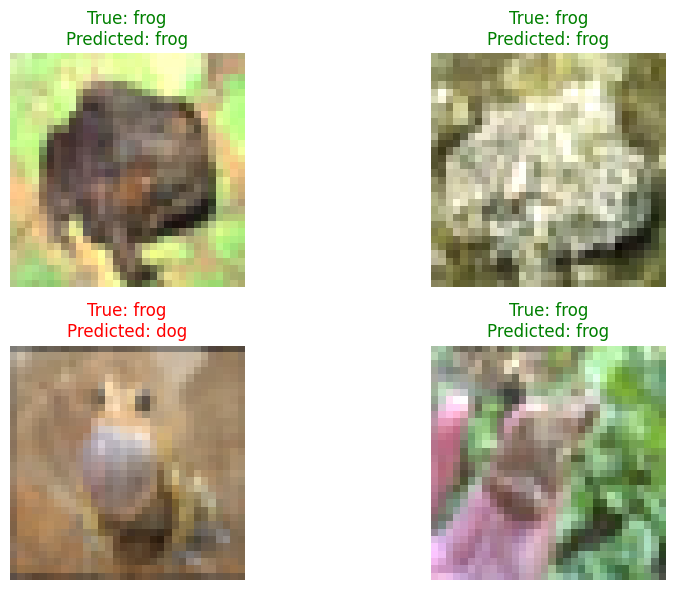

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
random_index = np.random.randint(0, len(poison), 4)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(poison[random_index[i]])
    ax.axis('off')

    if y_true[random_index[i]] == adv_preds[random_index[i]]:
        color = 'green'
    else:
        color = 'red'

    ax.set_title(
        f'True: {cifar10_class_labels[y_true[random_index[i]]]}\nPredicted: {cifar10_class_labels[adv_preds[random_index[i]]]}',
        color=color
    )

plt.tight_layout()
plt.show()